<a href="https://colab.research.google.com/github/Juanballer/Prueba_analista/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba uno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tabla_nueva = pd.read_csv('tabla_prueba.csv', delimiter=';')

In [5]:
conteo = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
conteo = conteo.rename(columns={'nombre_prestador': 'num_instituciones'})

print(conteo)

          Municipio  num_instituciones
0         ABEJORRAL                  0
1            ABREGO                  0
2          ABRIAQUI                  0
3           ACACIAS                  0
4            ACANDI                  0
...             ...                ...
1025         ZARZAL                  0
1026      ZETAQUIRA                  0
1027        ZIPACON                  0
1028      ZIPAQUIRA                  0
1029  ZONA BANANERA                  0

[1030 rows x 2 columns]


In [6]:
habitantes = tabla_nueva[['Municipio', 'PopTot']].drop_duplicates()
resultados = pd.merge(conteo, habitantes, on='Municipio', how='left')

print(resultados)

          Municipio  num_instituciones  PopTot
0         ABEJORRAL                  0   21622
1            ABREGO                  0   36177
2          ABRIAQUI                  0    2872
3           ACACIAS                  0   97925
4            ACANDI                  0   16096
...             ...                ...     ...
1112         ZARZAL                  0   43252
1113      ZETAQUIRA                  0    4996
1114        ZIPACON                  0    5782
1115      ZIPAQUIRA                  0  165473
1116  ZONA BANANERA                  0   78526

[1117 rows x 3 columns]


In [7]:
resultados['PopTot'] = resultados['PopTot'].astype(str).str.replace(r'\D', '', regex=True).replace('', '0').astype(int)
print(resultados['PopTot'].dtype)

int64


In [8]:
resultados['instituciones_por_habitante'] = resultados['num_instituciones'] / resultados['PopTot']

print(resultados)

          Municipio  num_instituciones  PopTot  instituciones_por_habitante
0         ABEJORRAL                  0   21622                          0.0
1            ABREGO                  0   36177                          0.0
2          ABRIAQUI                  0    2872                          0.0
3           ACACIAS                  0   97925                          0.0
4            ACANDI                  0   16096                          0.0
...             ...                ...     ...                          ...
1112         ZARZAL                  0   43252                          0.0
1113      ZETAQUIRA                  0    4996                          0.0
1114        ZIPACON                  0    5782                          0.0
1115      ZIPAQUIRA                  0  165473                          0.0
1116  ZONA BANANERA                  0   78526                          0.0

[1117 rows x 4 columns]


In [9]:
# Ordenar por número de instituciones (de mayor a menor)
resultados_ordenados = resultados.sort_values(by='num_instituciones', ascending=False)
print(resultados_ordenados)

        Municipio  num_instituciones   PopTot  instituciones_por_habitante
109        BOGOTA                 71  7937898                     0.000009
151          CALI                 15  2285099                     0.000007
91   BARRANQUILLA                 15  1342818                     0.000011
771      RIONEGRO                  8   147907                     0.000054
772      RIONEGRO                  8    27283                     0.000293
..            ...                ...      ...                          ...
376        GENOVA                  0     7809                     0.000000
375        GARZON                  0    79609                     0.000000
374       GARAGOA                  0    19582                     0.000000
373        GAMEZA                  0     5203                     0.000000
381     GIRARDOTA                  0    56312                     0.000000

[1117 rows x 4 columns]


In [10]:
# Ordenar por población (de mayor a menor)
resultados_ordenados_poblacion = resultados.sort_values(by='PopTot', ascending=False)
print(resultados_ordenados_poblacion)

          Municipio  num_instituciones   PopTot  instituciones_por_habitante
109          BOGOTA                 71  7937898                     0.000009
556        MEDELLIN                  6  2634570                     0.000002
151            CALI                 15  2285099                     0.000007
91     BARRANQUILLA                 15  1342818                     0.000011
174       CARTAGENA                  2  1065881                     0.000002
..              ...                ...      ...                          ...
134        CACAHUAL                  0     1039                     0.000000
660        PAPUNAUA                  0      844                     0.000000
710  PUERTO ALEGRIA                  0      803                     0.000000
502     LA VICTORIA                  0      702                     0.000000
472    LA GUADALUPE                  0      341                     0.000000

[1117 rows x 4 columns]


In [11]:
# Ordenar por instituciones por habitante (de mayor a menor)
resultados_ordenados_ratio = resultados.sort_values(by='instituciones_por_habitante', ascending=False)
print(resultados_ordenados_ratio)

           Municipio  num_instituciones  PopTot  instituciones_por_habitante
718  PUERTO COLOMBIA                  4    2273                     0.001760
67           ARMENIA                  4    5450                     0.000734
772         RIONEGRO                  8   27283                     0.000293
717  PUERTO COLOMBIA                  4   55835                     0.000072
771         RIONEGRO                  8  147907                     0.000054
..               ...                ...     ...                          ...
376           GENOVA                  0    7809                     0.000000
375           GARZON                  0   79609                     0.000000
374          GARAGOA                  0   19582                     0.000000
373           GAMEZA                  0    5203                     0.000000
381        GIRARDOTA                  0   56312                     0.000000

[1117 rows x 4 columns]


In [12]:
conteo_juridico = tabla_nueva.groupby(['Municipio', 'naturaleza_juridica'])['nombre_prestador'].count().reset_index()
conteo_juridico = conteo_juridico.rename(columns={'nombre_prestador': 'num_instituciones'})

total_por_municipio = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
total_por_municipio = total_por_municipio.rename(columns={'nombre_prestador': 'total_instituciones_municipio'})

In [13]:
# Conteo de instituciones por municipio
conteo_instituciones = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
conteo_instituciones = conteo_instituciones.rename(columns={'nombre_prestador': 'num_instituciones'})

# Extraer población única por municipio
poblacion = tabla_nueva[['Municipio', 'PopTot']].drop_duplicates()

# Unir conteo con población
cobertura = pd.merge(conteo_instituciones, poblacion, on='Municipio', how='left')

# Asegurar que 'PopTot' es numérico
cobertura['PopTot'] = pd.to_numeric(cobertura['PopTot'], errors='coerce')

# Calcular instituciones por habitante (por cada 1000 habitantes para mejor interpretación)
cobertura['instituciones_por_1000_hab'] = (cobertura['num_instituciones'] / cobertura['PopTot']) * 1000

# Mostrar municipios con menor cobertura institucional (por ejemplo, 10 municipios con menor ratio)
print(cobertura.sort_values('instituciones_por_1000_hab').head(10))

         Municipio  num_instituciones  PopTot  instituciones_por_1000_hab
739           PULI                  0    4044                         0.0
747       QUIMBAYA                  0   32175                         0.0
746         QUIBDO                  0  146875                         0.0
745        QUETAME                  0    6191                         0.0
744  QUEBRADANEGRA                  0    5766                         0.0
743       PURISIMA                  0   18734                         0.0
742   PURIFICACION                  0   24185                         0.0
741         PURACE                  0   18804                         0.0
740       PUPIALES                  0   18412                         0.0
748       QUINCHIA                  0   27980                         0.0


In [14]:
# Conteo de instituciones por municipio y naturaleza jurídica
juridica_municipio = tabla_nueva.groupby(['Municipio', 'naturaleza_juridica'])['nombre_prestador'].count().reset_index()
juridica_municipio = juridica_municipio.rename(columns={'nombre_prestador': 'num_instituciones'})

# Total de instituciones por municipio (para calcular porcentajes)
total_municipio = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
total_municipio = total_municipio.rename(columns={'nombre_prestador': 'total_instituciones'})

# Unir y calcular porcentaje de cada naturaleza jurídica en el municipio
juridica_municipio = pd.merge(juridica_municipio, total_municipio, on='Municipio')
juridica_municipio['porcentaje_naturaleza'] = (juridica_municipio['num_instituciones'] / juridica_municipio['total_instituciones']) * 100

# Para distribución nacional de naturaleza jurídica
juridica_nacional = tabla_nueva.groupby('naturaleza_juridica')['nombre_prestador'].count().reset_index()
juridica_nacional['porcentaje_nacional'] = (juridica_nacional['nombre_prestador'] / juridica_nacional['nombre_prestador'].sum()) * 100
juridica_nacional = juridica_nacional.rename(columns={'nombre_prestador': 'total_instituciones'})

print(juridica_municipio.head(10))  # Ejemplo de distribución municipal
print(juridica_nacional)            # Distribución nacional

      Municipio naturaleza_juridica  num_instituciones  total_instituciones  \
0       ARMENIA             Publica                  4                    4   
1  BARRANQUILLA             Privada                 15                   15   
2        BOGOTA             Privada                 46                   71   
3        BOGOTA             Publica                 25                   71   
4   BUCARAMANGA             Privada                  6                    7   
5   BUCARAMANGA             Publica                  1                    7   
6          CALI             Privada                 13                   15   
7          CALI             Publica                  2                   15   
8     CARTAGENA             Privada                  2                    2   
9          CHIA             Privada                  2                    2   

   porcentaje_naturaleza  
0             100.000000  
1             100.000000  
2              64.788732  
3              35.2112

In [15]:
# Número total de instituciones por municipio
instituciones_municipio = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
instituciones_municipio = instituciones_municipio.rename(columns={'nombre_prestador': 'num_instituciones'})

# Número de instituciones por municipio y naturaleza jurídica
instituciones_juridica = tabla_nueva.groupby(['Municipio', 'naturaleza_juridica'])['nombre_prestador'].count().reset_index()
instituciones_juridica = instituciones_juridica.rename(columns={'nombre_prestador': 'num_instituciones_juridica'})

# Extraemos rural
poblacion_rural = tabla_nueva[['Municipio', 'Rural']].drop_duplicates()

df_rural_instituciones = pd.merge(instituciones_municipio, poblacion_rural, on='Municipio', how='left')

# Convertir Rural a numérico
df_rural_instituciones['Rural'] = pd.to_numeric(df_rural_instituciones['Rural'], errors='coerce')

correlacion = df_rural_instituciones['Rural'].corr(df_rural_instituciones['num_instituciones'])
print(f"Correlación entre porcentaje rural y número total de instituciones: {correlacion:.3f}")


Correlación entre porcentaje rural y número total de instituciones: -0.120


El coeficiente de correlación de -0.120 indica una relación débil y negativa entre el porcentaje de población rural y el número total de instituciones. Esto sugiere que los municipios más rurales tienden a tener menos instituciones, aunque esta relación no es muy fuerte.

In [33]:
df_rural_juridica = pd.merge(instituciones_juridica, poblacion_rural, on='Municipio', how='left')

# Convertir Rural a numérico
df_rural_juridica['Rural'] = pd.to_numeric(df_rural_juridica['Rural'], errors='coerce')

# Dividir municipios en rurales (por ejemplo >50%) y no rurales
df_rural_juridica['zona'] = df_rural_juridica['Rural'].apply(lambda x: 'Alta ruralidad' if x > 0.5 else 'Baja ruralidad')

# Promedio de instituciones por naturaleza jurídica en cada zona
promedios = df_rural_juridica.groupby(['zona', 'naturaleza_juridica'])['num_instituciones_juridica'].mean().reset_index()

print(promedios)

             zona naturaleza_juridica  num_instituciones_juridica
0  Alta ruralidad             Privada                    6.000000
1  Alta ruralidad             Publica                    4.000000
2  Baja ruralidad             Privada                    6.500000
3  Baja ruralidad             Publica                    4.222222


In [34]:
# Extraemos la superficie única por municipio
Superficie = tabla_nueva[['Municipio', 'Superficie']].drop_duplicates()

# Convertir superficie a numérico
Superficie['Superficie'] = pd.to_numeric(Superficie['Superficie'], errors='coerce')

num_instituciones = tabla_nueva.groupby('Municipio')['nombre_prestador'].count().reset_index()
num_instituciones = num_instituciones.rename(columns={'nombre_prestador': 'num_instituciones'})

df_superficie_instituciones = pd.merge(num_instituciones, Superficie, on='Municipio', how='left')

correlacion = df_superficie_instituciones['Superficie'].corr(df_superficie_instituciones['num_instituciones'])
print(f"Correlación entre superficie y número de instituciones: {correlacion:.3f}")

Correlación entre superficie y número de instituciones: 0.007


Una correlación de 0.001 indica prácticamente ninguna relación entre la superficie del municipio y el número de instituciones que tiene.

In [18]:
df_superficie_instituciones['instituciones_por_km2'] = df_superficie_instituciones['num_instituciones'] / df_superficie_instituciones['Superficie']
print(df_superficie_instituciones.sort_values('instituciones_por_km2', ascending=False).head(10))

           Municipio  num_instituciones   Superficie  instituciones_por_km2
91      BARRANQUILLA                 15   161.872561               0.092665
717  PUERTO COLOMBIA                  4    73.709695               0.054267
119      BUCARAMANGA                  7   146.771616               0.047693
109           BOGOTA                 71  1766.442724               0.040194
771         RIONEGRO                  8   209.329541               0.038217
348    FLORIDABLANCA                  4   109.565293               0.036508
67           ARMENIA                  4   120.715140               0.033136
68           ARMENIA                  4   130.702585               0.030604
151             CALI                 15   540.813855               0.027736
195             CHIA                  2    82.927230               0.024118


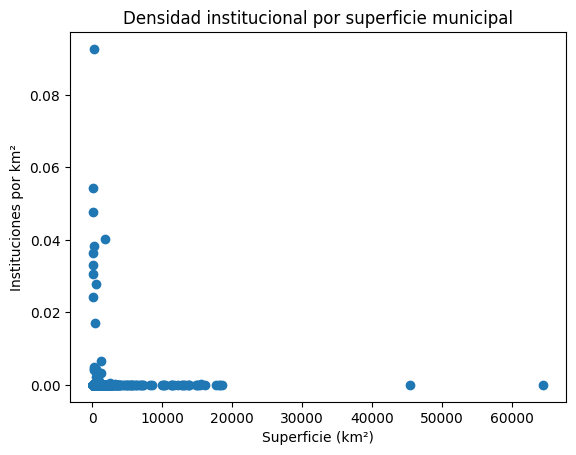

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df_superficie_instituciones['Superficie'], df_superficie_instituciones['instituciones_por_km2'])
plt.xlabel('Superficie (km²)')
plt.ylabel('Instituciones por km²')
plt.title('Densidad institucional por superficie municipal')
plt.show()

In [20]:
pib_municipio = tabla_nueva[['Municipio', 'Valor agregado']].drop_duplicates()

# Convertir Valor agregado a numérico por si acaso
pib_municipio['Valor agregado'] = pd.to_numeric(pib_municipio['Valor agregado'], errors='coerce')

df_pib_instituciones = pd.merge(num_instituciones, pib_municipio, on='Municipio', how='left')


instituciones_naturaleza = tabla_nueva.groupby(['Municipio', 'naturaleza_juridica'])['nombre_prestador'].count().reset_index()
instituciones_naturaleza = instituciones_naturaleza.rename(columns={'nombre_prestador': 'num_instituciones_naturaleza'})


df_pib_naturaleza = pd.merge(instituciones_naturaleza, pib_municipio, on='Municipio', how='left')


corr_pib_total = df_pib_instituciones['Valor agregado'].corr(df_pib_instituciones['num_instituciones'])
print(f"Correlación entre PIB y número total de instituciones: {corr_pib_total:.3f}")


Correlación entre PIB y número total de instituciones: 0.956


 El coeficiente de correlación de 0.956 indica una relación muy fuerte y positiva entre el PIB y el número total de instituciones, lo que sugiere que los municipios con economías más grandes tienden a tener más instituciones.

In [21]:
promedios_naturaleza = df_pib_naturaleza.groupby('naturaleza_juridica')['num_instituciones_naturaleza'].mean()
print(promedios_naturaleza)

naturaleza_juridica
Privada    6.45
Publica    4.20
Name: num_instituciones_naturaleza, dtype: float64


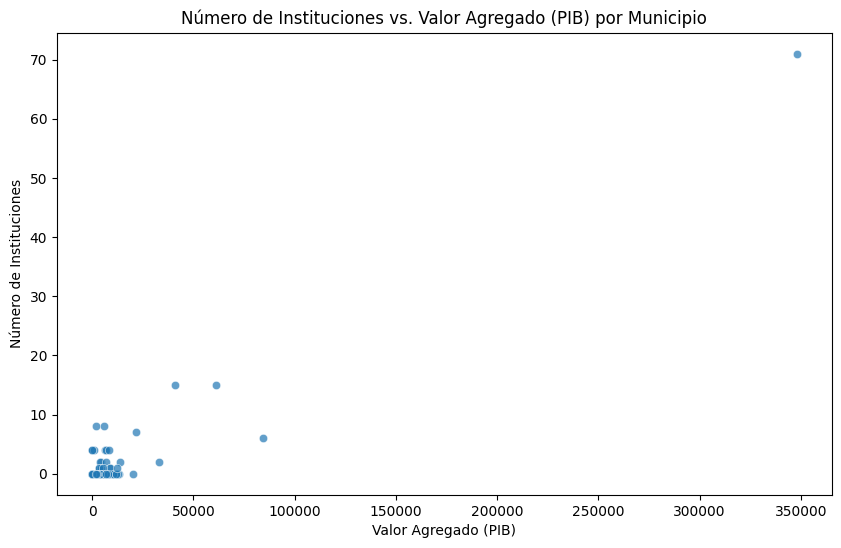

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pib_instituciones, x='Valor agregado', y='num_instituciones', alpha=0.7)
plt.title('Número de Instituciones vs. Valor Agregado (PIB) por Municipio')
plt.xlabel('Valor Agregado (PIB)')
plt.ylabel('Número de Instituciones')
plt.show()

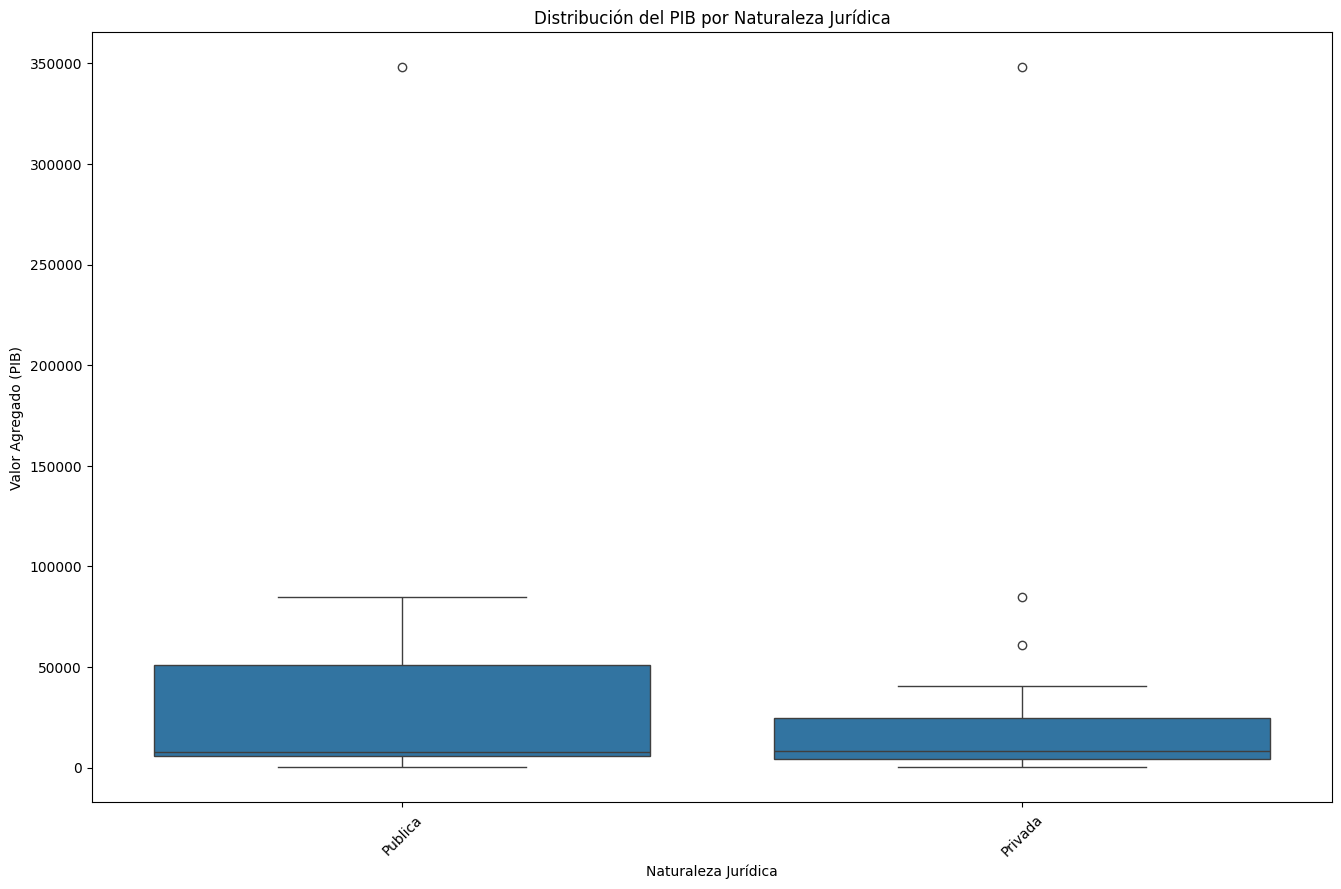

In [23]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_pib_naturaleza, x='naturaleza_juridica', y='Valor agregado')
plt.title('Distribución del PIB por Naturaleza Jurídica')
plt.xlabel('Naturaleza Jurídica')
plt.ylabel('Valor Agregado (PIB)')
plt.xticks(rotation=45)
plt.show()

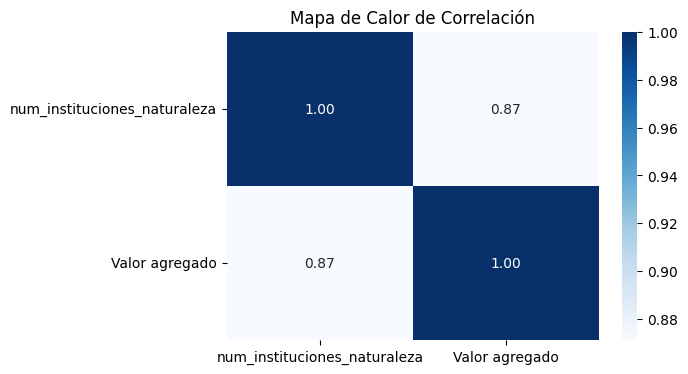

In [24]:
import numpy as np

correlacion_matrix = df_pib_naturaleza[['num_instituciones_naturaleza', 'Valor agregado']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlacion_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

<ipython-input-25-b0cf8d8b7ef4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_mas, x='Municipio', y='num_instituciones', palette='viridis')
<ipython-input-25-b0cf8d8b7ef4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_menos, x='Municipio', y='num_instituciones', palette='magma')


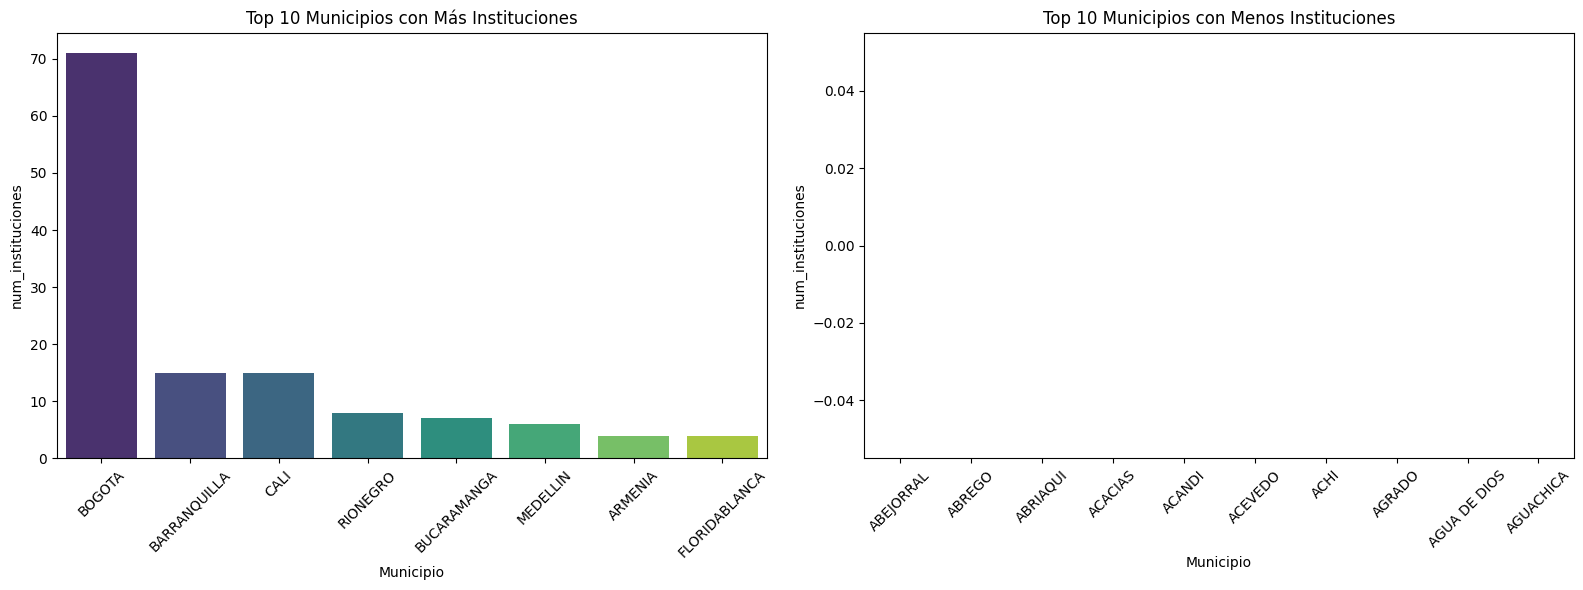

In [25]:
# Top 10 con más y menos instituciones
top_10_mas = df_pib_instituciones.nlargest(10, 'num_instituciones')
top_10_menos = df_pib_instituciones.nsmallest(10, 'num_instituciones')

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_mas, x='Municipio', y='num_instituciones', palette='viridis')
plt.title('Top 10 Municipios con Más Instituciones')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=top_10_menos, x='Municipio', y='num_instituciones', palette='magma')
plt.title('Top 10 Municipios con Menos Instituciones')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:

df_pib_instituciones = pd.merge(df_pib_instituciones, tabla_nueva[['Municipio', 'Rural']], on='Municipio', how='left')
df_pib_instituciones['tipo_municipio'] = df_pib_instituciones['Rural'].apply(lambda x: 'Rural' if x > 50 else 'Urbano')

print(df_pib_instituciones.columns)

Index(['Municipio', 'num_instituciones', 'Valor agregado', 'Rural',
       'tipo_municipio'],
      dtype='object')


<ipython-input-27-6bd905371ffd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pib_instituciones, x='tipo_municipio', y='num_instituciones', palette='Set2')


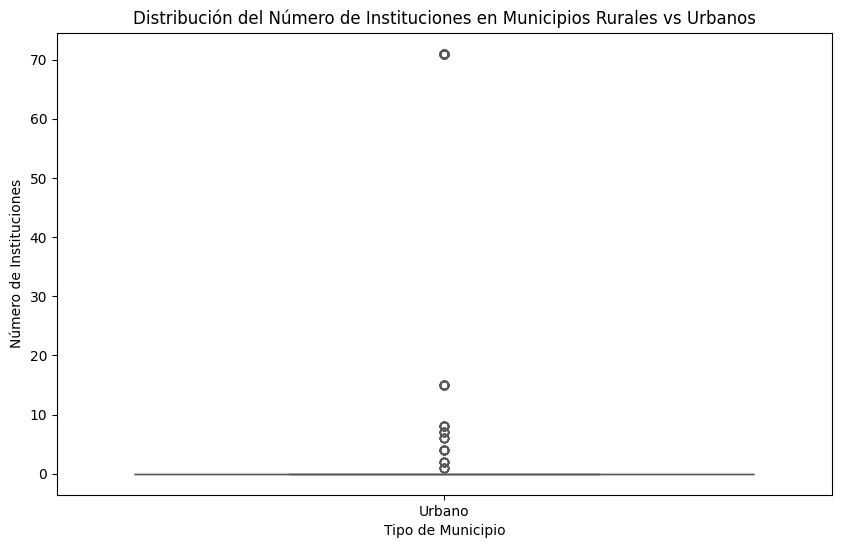

In [27]:
# Crear una nueva columna para clasificar rural vs urbano
df_pib_instituciones['tipo_municipio'] = df_pib_instituciones['Rural'].apply(lambda x: 'Rural' if x > 50 else 'Urbano')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pib_instituciones, x='tipo_municipio', y='num_instituciones', palette='Set2')
plt.title('Distribución del Número de Instituciones en Municipios Rurales vs Urbanos')
plt.xlabel('Tipo de Municipio')
plt.ylabel('Número de Instituciones')
plt.show()

In [28]:
print(df_pib_instituciones.head())

df_pib_instituciones.drop(columns=['Rural', 'PopTot'], errors='ignore', inplace=True)

df_pib_instituciones = pd.merge(df_pib_instituciones, tabla_nueva[['Municipio', 'PopTot', 'Rural']], on='Municipio', how='left')

print(df_pib_instituciones.head())


   Municipio  num_instituciones  Valor agregado  Rural tipo_municipio
0  ABEJORRAL                  0      511.370321  0.567         Urbano
1     ABREGO                  0      450.219265  0.473         Urbano
2   ABRIAQUI                  0       54.418135  0.642         Urbano
3    ACACIAS                  0     6931.713712  0.244         Urbano
4     ACANDI                  0      101.127956  0.561         Urbano
   Municipio  num_instituciones  Valor agregado tipo_municipio  PopTot  Rural
0  ABEJORRAL                  0      511.370321         Urbano   21622  0.567
1     ABREGO                  0      450.219265         Urbano   36177  0.473
2   ABRIAQUI                  0       54.418135         Urbano    2872  0.642
3    ACACIAS                  0     6931.713712         Urbano   97925  0.244
4     ACANDI                  0      101.127956         Urbano   16096  0.561


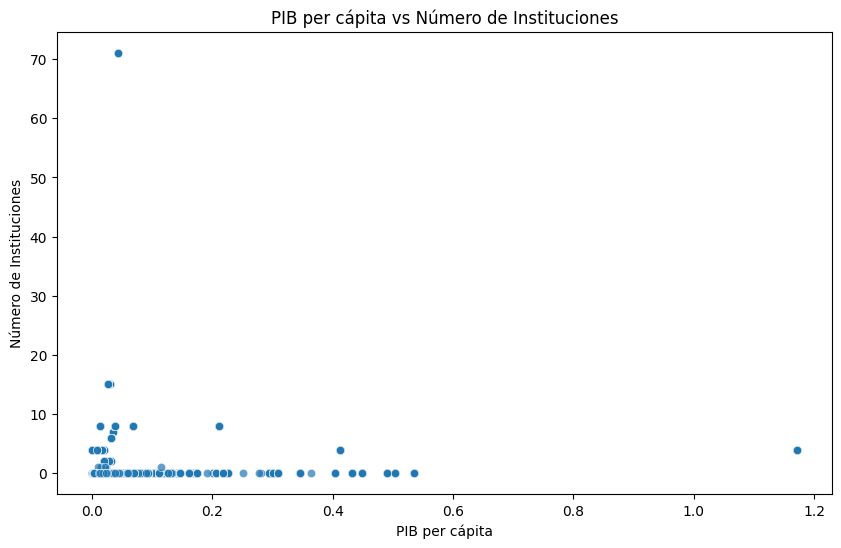

In [29]:

# Calcular PIB per cápita
df_pib_instituciones['PIB_per_capita'] = df_pib_instituciones['Valor agregado'] / df_pib_instituciones['PopTot']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pib_instituciones, x='PIB_per_capita', y='num_instituciones', alpha=0.7)
plt.title('PIB per cápita vs Número de Instituciones')
plt.xlabel('PIB per cápita')
plt.ylabel('Número de Instituciones')
plt.show()

In [31]:
import plotly.express as px

fig = px.treemap(df_pib_naturaleza, path=['naturaleza_juridica', 'Municipio'], values='Valor agregado',
                 color='Valor agregado', title='Distribución del PIB por Naturaleza Jurídica')
fig.show()

In [32]:
naturaleza_total = df_pib_naturaleza.groupby('naturaleza_juridica')['num_instituciones_naturaleza'].sum().reset_index()

fig = px.pie(naturaleza_total, values='num_instituciones_naturaleza', names='naturaleza_juridica',
             title='Proporción de Instituciones por Naturaleza Jurídica')
fig.show()